In [24]:
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
# one hot encode the categorical data and update the dataset
df = pd.get_dummies(df, drop_first=True)

In [8]:
from sklearn.model_selection import train_test_split

In [14]:
# get the label and features and split into test and training sets
y = df["area"].values
X = df.drop("area", axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [51]:
# for normalizing the data (making the features on the same scale)
input_shape = (len(df.columns) - 1,)
normalizer = preprocessing.Normalization(input_shape=input_shape)
normalizer.adapt(X_train)

In [57]:
model = Sequential([
    normalizer,
    Dense(50, activation="relu"),
    Dense(15, activation="relu"),
    Dense(1)
])

In [58]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 27)                55        
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1400      
_________________________________________________________________
dense_7 (Dense)              (None, 15)                765       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 2,236
Trainable params: 2,181
Non-trainable params: 55
_________________________________________________________________


In [60]:
history = model.fit(X_train,y_train, validation_split=0.2,epochs=50, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=3)],
                    batch_size=25
                   )

Epoch 1/50
12/12 [==============================] - 0s 21ms/step - loss: 5976.4374 - val_loss: 723.3821
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 7530.9436 - val_loss: 718.1191
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 3000.3923 - val_loss: 713.2117
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 1894.1118 - val_loss: 708.7346
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 2760.7287 - val_loss: 703.5685
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 4319.6893 - val_loss: 697.4932
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 3444.9291 - val_loss: 691.9853
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 3228.7623 - val_loss: 686.2281
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 7941.9984 - val_loss: 679.4627
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss:

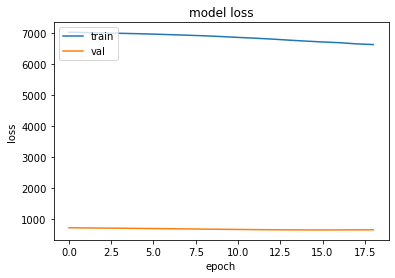

In [61]:
# plot the loss graphs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()